# __Particle tracking__

### Problem statement

Once flow is computed on a DFN, one can compute the transport properties using a particle tracking approach. <br/>

<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/particles.png" width="500"/>
</div>
<br>
Particles trajectories in a DFN
</center>

### Theorical background

Basic knowledge about advective transport is required.
<br>
We recall that particles velocities are constant inside the mesh triangles.

### What will you learn ?
- Apply transport boundary conditions (particles generation)
- Run particle tracking
- Compute transport indicators
- Access particles trajectories and information

### DFN.Lab model

The required module is __ParticlesTracking__.

In [1]:
import dfnlab.ParticlesTracking as dfnPTrack

_____________

### Solve flow on a DFN

The current tutorial is built on the same example as in the tutorial on steady-state flow. We create cubic domain, import previously generated DFN and mesh from file and apply properties and boundary conditions.

In [2]:
import dfnlab.System as sys
import dfnlab.Domains as dom
import dfnlab.Fractures as dfn
import dfnlab.FlowBoundaryConditions as bc
import dfnlab.Mesh as mesh
import dfnlab.Flow as flow
import dfnlab.MaterialProperties as mat
import numpy as np
import os
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=1.)
system.setDomain(domain)
fnet = dfn.DFN()
system.setDFN(fnet)
dfn.load_disk_file(fnet,filename='sources/Ktest.disk')
system.build()
meshDFN = mesh.Mesh(system)
meshDFN.load("sources/MeshExamples/KTestFine/")
bc.FlowBoundaryCondition.setPermeameter(domain,10,np.array([0,0,1]))
mat.Transmissivities.setConstant(fnet,1)
flow_system = flow.solveDarcyProblem(meshDFN)

number of intersections 24
solveDarcyProblem
61899
Linear system building 
Taking account of the boundary conditions
Linear System solving
compute the indicators


We visualise the meshed DFN and the hydraulic head.

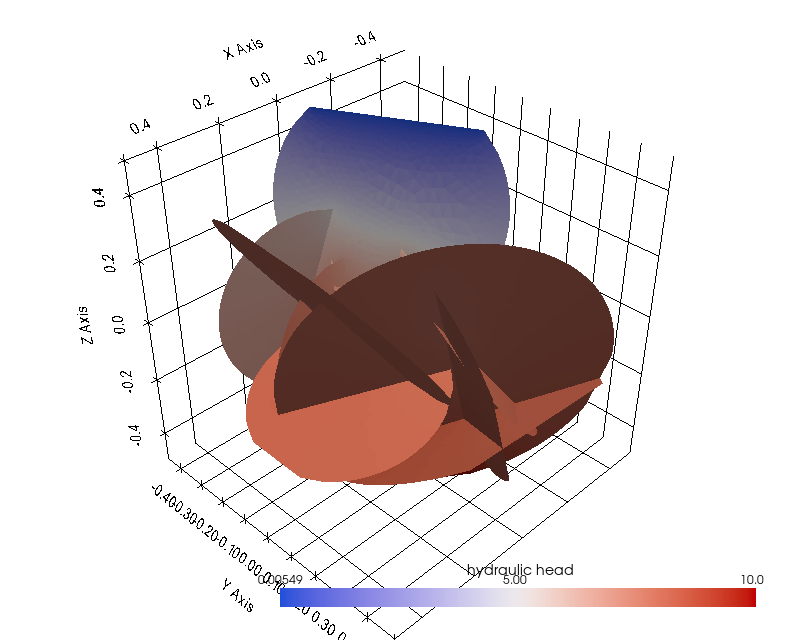

In [3]:
from sources.functions import plot_mesh
plot_mesh(meshDFN,flow_system.getHead(),"hydraulic head")

### Apply transport boundary conditions (particles generation)

First, we create an empty set of particles.

In [4]:
particlesSet =  dfnPTrack.ParticleSet(flow_system)

Then, we create a particle generator. Particles can be generated on any object (borders, wells, fracture intersections...). <br>In this example, the particles are generated on the domain bottom border  (*Note that border ids ranging from 0 to 5 stands for  $x_{min}$,  $x_{max}$,  $y_{min}$,  $y_{max}$,  $z_{min}$ and  $z_{max}$.*)

In [5]:
generator = dfnPTrack.ParticlesGenerator(particlesSet)
generator.setSeed(1001)
generator.addObject(system.getDomain().getBorder(4))

True

The method _generate_ serves the purpose of creating the specified number of particles within the particle set. Each particle is generated at the edge of a traingle that is an intersection between a fracture and the selected domain boundary.The particle generator utilizes a flow-weighted generation approach, which means that the number of particles generated in a boundary triangle is proportional to the flow (measured in $m^3/s$) within that particular triangle.

This flow-weighted particle generation strategy ensures that the generated particle set is representative of the flow distribution within the system, allowing for more accurate and meaningful simulations of flow processes.

In [6]:
generator.generate(100)
print("Number of particles: {}".format(particlesSet.numParticles()))

Number of particles: 100


### Run Particle Tracking

The particle tracking algorithm operates by moving particles in triangles based on the velocity within each triangle. Consequently, the particles follow the flow path, transitioning from one fracture to another by crossing the intersections between fractures.

By default, the particle's position and velocity are saved only at the intersections between fractures to optimize memory usage. THowever, for more detailed analyses, it is possible to save the complete trajectory for all particles by using the following line of code:

```python
analyser.saveAllPositions()
```

Enabling this option provides a more comprehensive set of data for in-depth investigations and detailed examination of particle behavior during the tracking process.


In [7]:
particlesSet.saveAllPositions()

Then, you can run the particle tracking algorithm.
<br>

In [8]:
particlesSet.run()

Visualisation.

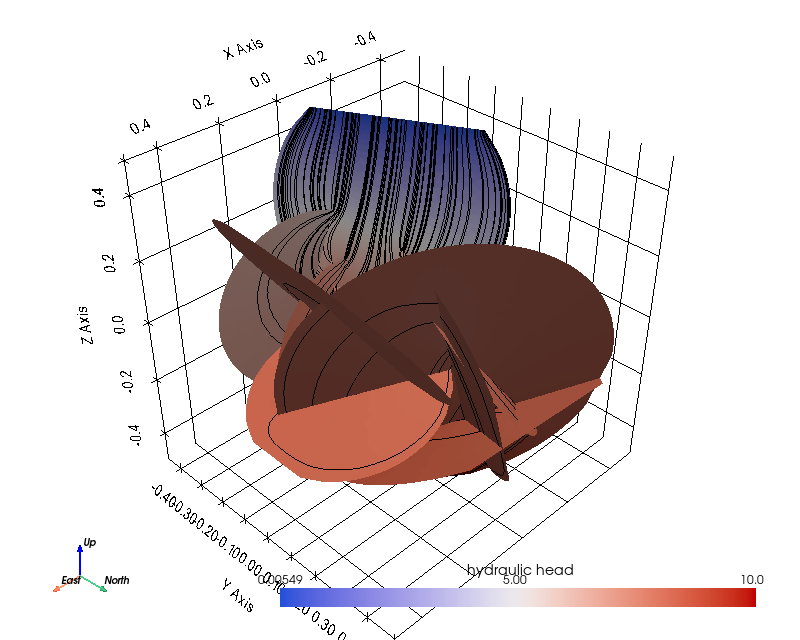

In [9]:
from sources.functions import plot_flow_particles
plot_flow_particles(meshDFN, particlesSet,flow_system.getHead(),"hydraulic head")

### Compute transport indicators

The access to transport indicators is similar to the access to flow indicators.

You have access to the main statistical indicator, concerning time of flights...

In [10]:
timeOfFlights = particlesSet.getIndicators("timeOfFlight")
timeOfFlightsStat = timeOfFlights.getStatisticalDistribution()

print("Minimum time of flight: {}".format(timeOfFlightsStat.getMinimum()))
print("Maximum time of flight: {}".format(timeOfFlightsStat.getMaximum()))
print("Mean time of flight: {}".format(timeOfFlightsStat.getMean()))
print("Median time of flight: {}".format(timeOfFlightsStat.getMedian()))
print("Standard deviation time of flight: {}".format(timeOfFlightsStat.getStandardDeviation()))
print("Variance time of flight: {}".format(timeOfFlightsStat.getVariance()))
print("Skewness time of flight: {}".format(timeOfFlightsStat.getSkewness()))
print("Kurtosis time of flight: {}".format(timeOfFlightsStat.getKurtosis()))

Minimum time of flight: 0.0015935899386579503
Maximum time of flight: 0.040000112024134116
Mean time of flight: 0.003807216882349895
Median time of flight: 0.002683524826024928
Standard deviation time of flight: 0.004628461396882579
Variance time of flight: 2.1422654902432238e-05
Skewness time of flight: 1.8833968591594335e-08
Kurtosis time of flight: 2.967145177826153e-14


... and length of flights.

In [11]:
lengthofFlights = particlesSet.getIndicators("lengthOfFlight")
lengthofFlightsStats = lengthofFlights.getStatisticalDistribution()

print("Minimum length of flight: {}".format(lengthofFlightsStats.getMinimum()))
print("Maximum length of flight: {}".format(lengthofFlightsStats.getMaximum()))
print("Mean length of flight: {}".format(lengthofFlightsStats.getMean()))
print("Median length of flight: {}".format(lengthofFlightsStats.getMedian()))
print("Standard deviation length of flight: {}".format(lengthofFlightsStats.getStandardDeviation()))
print("Variance length of flight: {}".format(lengthofFlightsStats.getVariance()))
print("Skewness length of flight: {}".format(lengthofFlightsStats.getSkewness()))
print("Kurtosis length of flight: {}".format(lengthofFlightsStats.getKurtosis()))

Minimum length of flight: 1.0688247406911546
Maximum length of flight: 2.142067614797101
Mean length of flight: 1.3031201910877184
Median length of flight: 1.2813790277823376
Standard deviation length of flight: 0.1745419259261109
Variance length of flight: 0.030464883905995985
Skewness length of flight: 0.007760273683116152
Kurtosis length of flight: 0.00264053462705289


The computation of probability density function of the statistics is also available, and plotted below.

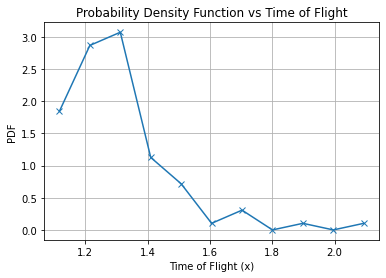

In [13]:
import matplotlib.pyplot as plt
lp,pdf = lengthofFlightsStats.getPDF()
plt.plot(lp, pdf, '-x')
plt.xlabel('Time of Flight (x)')
plt.ylabel('PDF')
plt.title('Probability Density Function vs Time of Flight')
plt.grid(True)
plt.show()

### Access to particles

Particles can be accessed through a loop on the particle set:

In [ ]:
for p in particlesSet:
    position = p.getPosition()

Or accessed directly using their index.

In [ ]:
particle = particlesSet.getParticle(45)

You have access to the number of positions of a particle.

In [ ]:
print("Number of positions of the particle: {}".format(particle.getNumberOfPositionInTrajectory()))

Number of positions of the particle: 107


Then, you have access to more information on each position, such as position, velocity, elements, extras, indicators ...

In [ ]:
posList=[]
timeList=[]
for p in range(particle.getNumberOfPositionInTrajectory()):
    positionInfo = particle.getPositionInformation(p)
    posList.append(positionInfo.getPosition())
    timeList.append(positionInfo.getTime())
    
print("Last position and last time are : {} and {}".format(positionInfo.getPosition(),positionInfo.getTime()))

Last position and last time are : [-0.04887072 -0.35075703  0.5       ] and 0.002047058743473772


You can also access all positions of the particle through an iterator.

In [ ]:
posList2=[]
for positionInfo in particle:
    posList2.append(positionInfo.getPosition())
    print(positionInfo.getPosition())

[-0.18712888  0.08740659 -0.5       ]
[-0.18218166  0.08082074 -0.48734387]
[-0.18054904  0.07893122 -0.48354334]
[-0.17426843  0.07265435 -0.4702372 ]
[-0.17180978  0.07131056 -0.46650343]
[-0.16547165  0.06572753 -0.45407085]
[-0.1626457   0.06429127 -0.44992274]
[-0.15962978  0.06220749 -0.44476579]
[-0.15215231  0.05661396 -0.4314141 ]
[-0.14833965  0.05321602 -0.42388302]
[-0.14247993  0.04879866 -0.41337493]
[-0.13931571  0.04545756 -0.40643435]
[-0.13383763  0.04065341 -0.39571702]
[-0.12927525  0.03540521 -0.3851389 ]
[-0.12663543  0.03261348 -0.37934282]
[-0.12619234  0.03211349 -0.37832835]
[-0.12105573  0.02497747 -0.36479284]
[-0.11989932  0.02335818 -0.36172869]
[-0.11522361  0.01848165 -0.35155294]
[-0.11104092  0.0141604  -0.34250461]
[-0.10682311  0.00958424 -0.33309062]
[-0.10670278  0.00945342 -0.33282169]
[-0.10046524  0.0025593  -0.31873198]
[-0.09399266 -0.00493336 -0.30366254]
[-0.09334492 -0.0056964  -0.30213696]
[-0.08739539 -0.01299564 -0.28773933]
[-0.08643053

All indicators and methods are listed in the documentation.